In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
import matplotlib.cm as cm
import seaborn as sns

In [2]:
# Read in CSV from desktop
james_df = pd.read_csv("/Users/tamarapichardo/Desktop/tamara-pichardo.github.io/data/1_lebron_james_shot_chart_1_2023.csv")

# Rename shot types from numbers to readable labels
james_df['shot_type'] = james_df['shot_type'].replace({2: '2-point shot', 3: '3-point shot'})

# Rename result from True/False to Made/Missed
james_df['result'] = james_df['result'].replace({True: 'Made', False: 'Missed'})

# Print first 5 rows
print(james_df.head())

   top  left          date      qtr time_remaining  result     shot_type  \
0  310   203  Oct 18, 2022  1st Qtr          09:26  Missed  3-point shot   
1  213   259  Oct 18, 2022  1st Qtr          08:38  Missed  2-point shot   
2  143   171  Oct 18, 2022  1st Qtr          08:10  Missed  2-point shot   
3   68   215  Oct 18, 2022  1st Qtr          05:24    Made  2-point shot   
4   66   470  Oct 18, 2022  1st Qtr          01:02  Missed  3-point shot   

   distance_ft   lead  lebron_team_score  opponent_team_score opponent team  \
0           26  False                  2                    2      GSW  LAL   
1           16  False                  4                    5      GSW  LAL   
2           11  False                  4                    7      GSW  LAL   
3            3  False                 12                   19      GSW  LAL   
4           23  False                 22                   23      GSW  LAL   

   season  color  
0    2023    red  
1    2023    red  
2    2023  

/var/folders/0m/ws_khq0n77lf41jfn_gnmm4c0000gn/T/ipykernel_83551/2721800511.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'shot_type', data = james_df, palette = 'viridis')


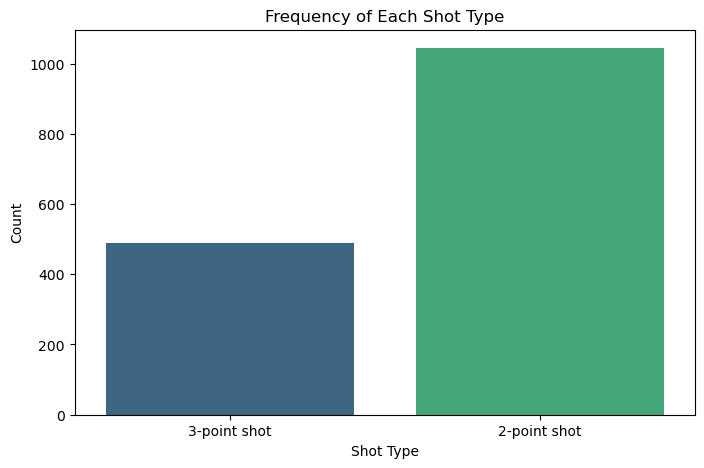

In [3]:
# Bar Chart 1: Frequency of Each Shot Type
plt.figure(figsize = (8,5))
sns.countplot(x = 'shot_type', data = james_df, palette = 'viridis')
plt.title("Frequency of Each Shot Type")
plt.xlabel("Shot Type")
plt.ylabel("Count")
plt.show()

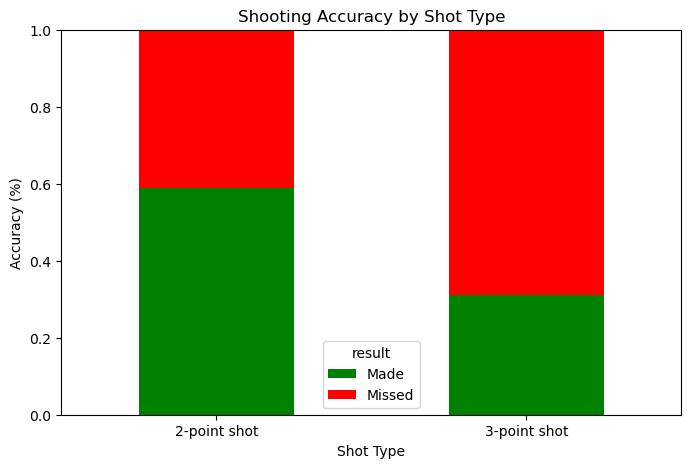

In [4]:
# Bar Chart 2: Shooting Accuracy by Shot Type

# Group by shot type and result, calculate percentage
accuracy_by_type = james_df.groupby('shot_type')['result'].value_counts(normalize = True).unstack().fillna(0)

# Plot as grouped bar chart
accuracy_by_type[['Made', 'Missed']].plot(kind = 'bar',
                                             stacked = True,
                                             color = ['green', 'red'],
                                             figsize = (8,5))
plt.title("Shooting Accuracy by Shot Type")
plt.xlabel("Shot Type")
plt.ylabel("Accuracy (%)")
plt.ylim(0,1)
plt.xticks(rotation = 0)
plt.show()

In [5]:
# Coordinate conversion function

def convert_coords(df):
    """
    Converts shot coordinates from image-based space to court space

    Assumes:
    - 'left' ranges from 0 to ~400 (image pixels) - center it around 0
    - 'top' already increases from basket to halfcourt, so no flip needed
    """
    df['court_x'] = df['left'] - 240 # Center x around 0 to match court
    df['court_y'] = df['top']        # Y is already in the correct direction

    return df

# Apply coordinate conversion to James's shot data
james_df = convert_coords(james_df)

In [8]:
# Court Drawing Function
def draw_nba_court(axis = None):
    """
    Draws an NBA halfcourt using matplotlib primitives.

    Args:
        axis (matplotlib axis): Optional axis to draw on. Creates one if not provided.

    Returns:
        fig. axis: Figures and axis with the court drawn
    """
    if axis is None:
        fig = plt.figure(figsize = (9,9))
        axis = fig.add_subplot(111, aspect = 'auto')
    else:
        fig = None

    # Court Outline (Baseline, Sidelines, Halfcourt Line)
    axis.plot([-250, 250], [-47.5, -47.5], 'k-')  # Baseline
    axis.plot([-250, -250], [-47.5, 422.5], 'k-')  # Left Sideline
    axis.plot([250, 250], [-47.5, 422.5], 'k-')  # Right Sideline
    axis.plot([-250, 250], [422.5, 422.5], 'k-')  # Halfcourt Line

    # Backboard
    axis.plot([-30, 30], [-10, -10], 'k-', lw = 2)

    # Paint / Lane
    axis.plot([-80, -80], [-47.5, 142.5], 'k-')
    axis.plot([80, 80], [-47.5, 142.5], 'k-')
    axis.plot([-60, -60], [-47.5, 142.5], 'k-')
    axis.plot([60, 60], [-47.5, 142.5], 'k-')  
    axis.plot([-80, 80], [142.5, 142.5], 'k-')  # Free Throw Line

    # Hoop and Restricted Area
    hoop = Arc((0,0), 15, 15, theta1 = 0, theta2 = 360, lw = 1.5, color = 'black')
    restricted = Arc((0,0), 80, 80, theta1 = 0, theta2 = 180, lw = 1.5, color = 'black')
    axis.add_patch(hoop)
    axis.add_patch(restricted)

    # Free Throw Circle
    axis.add_patch(Arc((0, 142.5), 120, 120, theta1 = 0, theta2 = 180, lw = 1.5, color = 'black'))  # Top Half
    axis.add_patch(Arc((0, 142.5), 120, 120, theta1 = 180, theta2 = 360, lw = 1.5, linestyle = '--', color = 'black'))  # Bottom Half

    # 3 Point Lines
    axis.plot([-220, -220], [-47.5, 92.5], 'k-') # Left corner 3
    axis.plot([220, 220], [-47.5, 92.5], 'k-')  # Right corner 3
    axis.add_patch(Arc((0, 0), 475, 475, theta1 = 22, theta2 = 158, lw = 1.5, color = 'black'))  # 3 pt arc

    # Halfcourt Circle
    axis.add_patch(Arc((0, 422.5), 122, 122, theta1 = 180, theta2 = 360, lw = 1.5, color = 'black'))

    # Axis Settings
    axis.set_xlim(-250, 250)
    axis.set_ylim(-47.5, 470)
    axis.set_aspect(1)  # Equal aspect ratio
    axis.axis('off')    # Hide axes

    return fig, axis

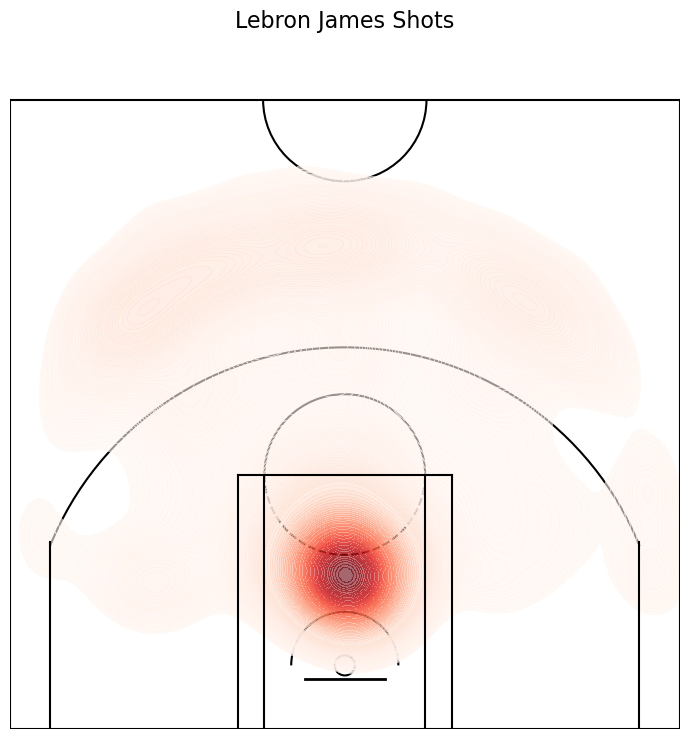

In [11]:
# Create plot and axis
fig, ax = plt.subplots(figsize = (9,9))

# Draw halfcourt on axis
draw_nba_court(ax)

# Overlay KDE heatmap of James's shot locations
kde = sns.kdeplot(
    x = james_df['court_x'],
    y = james_df['court_y'],
    fill = True,
    cmap = 'Reds',
    bw_adjust = 0.8,
    alpha = 0.6,
    levels = 100,
    thresh = 0.05,
    ax = ax)

plt.title("Lebron James Shots", fontsize = 16)
plt.show()

In [12]:
# Read in CSV from desktop
harden_df = pd.read_csv("/Users/tamarapichardo/Desktop/tamara-pichardo.github.io/data/2_james_harden_shot_chart_2023.csv")

# Rename shot types from numbers to readable labels
harden_df['shot_type'] = harden_df['shot_type'].replace({2: '2-point shot', 3: '3-point shot'})

# Rename result from True/False to Made/Missed
harden_df['result'] = harden_df['result'].replace({True: 'Made', False: 'Missed'})

# Print first 5 rows
print(harden_df.head())

   top  left          date      qtr time_remaining  result     shot_type  \
0  323   329  Oct 18, 2022  1st Qtr           8:52  Missed  3-point shot   
1  340   265  Oct 18, 2022  1st Qtr           4:08    Made  3-point shot   
2  304   318  Oct 18, 2022  1st Qtr           2:51    Made  3-point shot   
3  116   280  Oct 18, 2022  1st Qtr           2:21    Made  2-point shot   
4  320   188  Oct 18, 2022  2nd Qtr           6:21    Made  3-point shot   

   distance_ft   lead  lebron_team_score  opponent_team_score opponent team  \
0           28  False                  2                    9      BOS  PHI   
1           29   True                 18                   17      BOS  PHI   
2           26   True                 22                   17      BOS  PHI   
3            7   True                 25                   17      BOS  PHI   
4           27   True                 45                   43      BOS  PHI   

   season  color  
0    2023    red  
1    2023  green  
2    2023  

/var/folders/0m/ws_khq0n77lf41jfn_gnmm4c0000gn/T/ipykernel_83551/3400465221.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'shot_type', data = harden_df, palette = 'viridis')


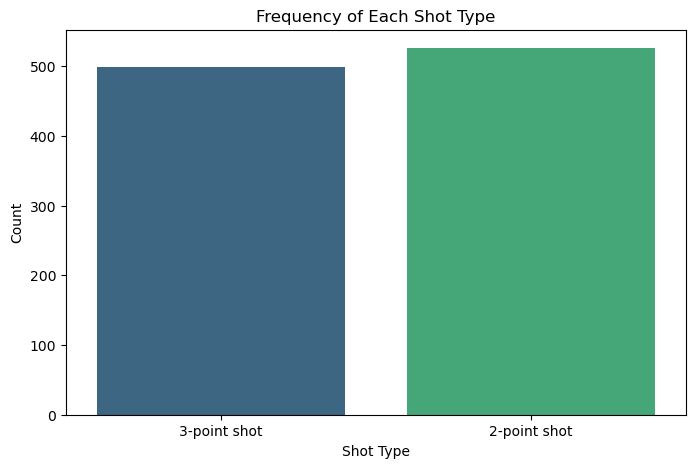

In [13]:
# Bar Chart 1: Frequency of Each Shot Type
plt.figure(figsize = (8,5))
sns.countplot(x = 'shot_type', data = harden_df, palette = 'viridis')
plt.title("Frequency of Each Shot Type")
plt.xlabel("Shot Type")
plt.ylabel("Count")
plt.show()

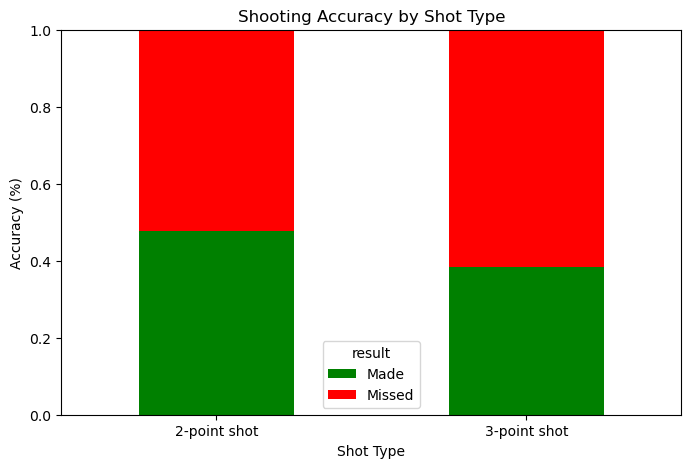

In [14]:
# Bar Chart 2: Shooting Accuracy by Shot Type

# Group by shot type and result, calculate percentage
accuracy_by_type = harden_df.groupby('shot_type')['result'].value_counts(normalize = True).unstack().fillna(0)

# Plot as grouped bar chart
accuracy_by_type[['Made', 'Missed']].plot(kind = 'bar',
                                             stacked = True,
                                             color = ['green', 'red'],
                                             figsize = (8,5))
plt.title("Shooting Accuracy by Shot Type")
plt.xlabel("Shot Type")
plt.ylabel("Accuracy (%)")
plt.ylim(0,1)
plt.xticks(rotation = 0)
plt.show()

In [15]:
# Coordinate conversion function

def convert_coords(df):
    """
    Converts shot coordinates from image-based space to court space

    Assumes:
    - 'left' ranges from 0 to ~400 (image pixels) - center it around 0
    - 'top' already increases from basket to halfcourt, so no flip needed
    """
    df['court_x'] = df['left'] - 240 # Center x around 0 to match court
    df['court_y'] = df['top']        # Y is already in the correct direction

    return df

# Apply coordinate conversion to Harden's shot data
harden_df = convert_coords(harden_df)

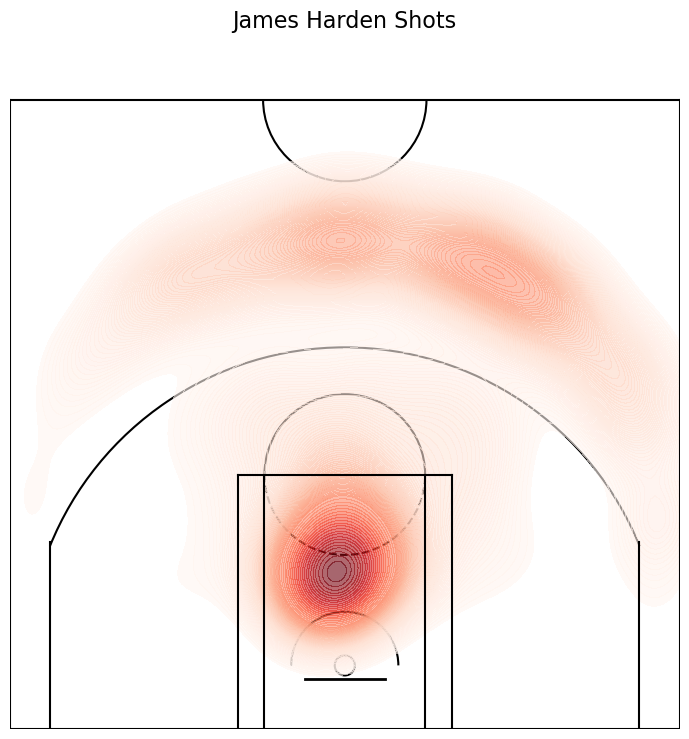

In [16]:
# Create plot and axis
fig, ax = plt.subplots(figsize = (9,9))

# Draw halfcourt on axis
draw_nba_court(ax)

# Overlay KDE heatmap of Harden's shot locations
kde = sns.kdeplot(
    x = harden_df['court_x'],
    y = harden_df['court_y'],
    fill = True,
    cmap = 'Reds',
    bw_adjust = 0.8,
    alpha = 0.6,
    levels = 100,
    thresh = 0.05,
    ax = ax)

plt.title("James Harden Shots", fontsize = 16)
plt.show()

In [18]:
# Read in CSV from desktop
curry_df = pd.read_csv("/Users/tamarapichardo/Desktop/tamara-pichardo.github.io/data/3_stephen_curry_shot_chart_2023.csv")

# Rename shot types from numbers to readable labels
curry_df['shot_type'] = curry_df['shot_type'].replace({2: '2-point shot', 3: '3-point shot'})

# Rename result from True/False to Made/Missed
curry_df['result'] = curry_df['result'].replace({True: 'Made', False: 'Missed'})

# Print first 5 rows
print(curry_df.head())

   top  left          date      qtr time_remaining  result     shot_type  \
0   63   300  Oct 18, 2022  1st Qtr           7:27  Missed  2-point shot   
1  133   389  Oct 18, 2022  1st Qtr           7:22    Made  2-point shot   
2  326   247  Oct 18, 2022  1st Qtr           7:11  Missed  3-point shot   
3  249    89  Oct 18, 2022  1st Qtr           5:16  Missed  3-point shot   
4  282   158  Oct 18, 2022  1st Qtr           3:52  Missed  3-point shot   

   distance_ft  lead  lebron_team_score  opponent_team_score opponent team  \
0            6  True                  9                    6      LAL  GSW   
1           17  True                 11                    6      LAL  GSW   
2           27  True                 11                    6      LAL  GSW   
3           25  True                 19                   13      LAL  GSW   
4           24  True                 22                   17      LAL  GSW   

   season  color  
0    2023    red  
1    2023  green  
2    2023    red 

/var/folders/0m/ws_khq0n77lf41jfn_gnmm4c0000gn/T/ipykernel_83551/3378142554.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'shot_type', data = curry_df, palette = 'viridis')


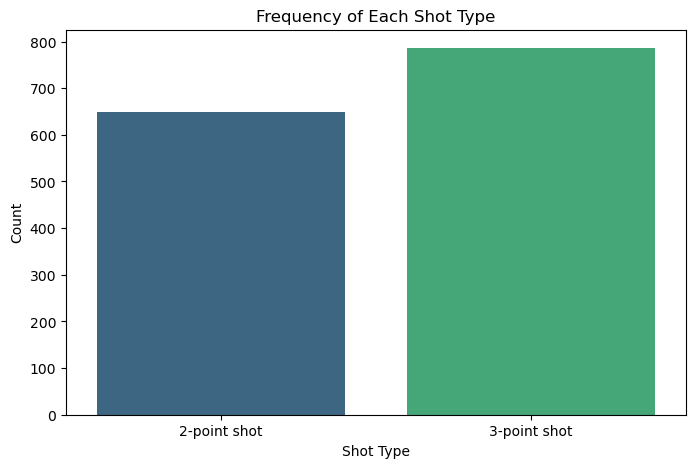

In [19]:
# Bar Chart 1: Frequency of Each Shot Type
plt.figure(figsize = (8,5))
sns.countplot(x = 'shot_type', data = curry_df, palette = 'viridis')
plt.title("Frequency of Each Shot Type")
plt.xlabel("Shot Type")
plt.ylabel("Count")
plt.show()

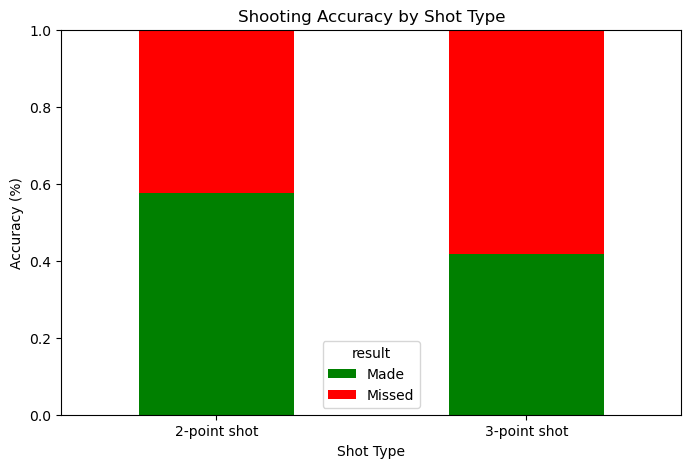

In [20]:
# Bar Chart 2: Shooting Accuracy by Shot Type

# Group by shot type and result, calculate percentage
accuracy_by_type = curry_df.groupby('shot_type')['result'].value_counts(normalize = True).unstack().fillna(0)

# Plot as grouped bar chart
accuracy_by_type[['Made', 'Missed']].plot(kind = 'bar',
                                             stacked = True,
                                             color = ['green', 'red'],
                                             figsize = (8,5))
plt.title("Shooting Accuracy by Shot Type")
plt.xlabel("Shot Type")
plt.ylabel("Accuracy (%)")
plt.ylim(0,1)
plt.xticks(rotation = 0)
plt.show()

In [21]:
# Coordinate conversion function

def convert_coords(df):
    """
    Converts shot coordinates from image-based space to court space

    Assumes:
    - 'left' ranges from 0 to ~400 (image pixels) - center it around 0
    - 'top' already increases from basket to halfcourt, so no flip needed
    """
    df['court_x'] = df['left'] - 240 # Center x around 0 to match court
    df['court_y'] = df['top']        # Y is already in the correct direction

    return df

# Apply coordinate conversion to Curry's shot data
curry_df = convert_coords(curry_df)

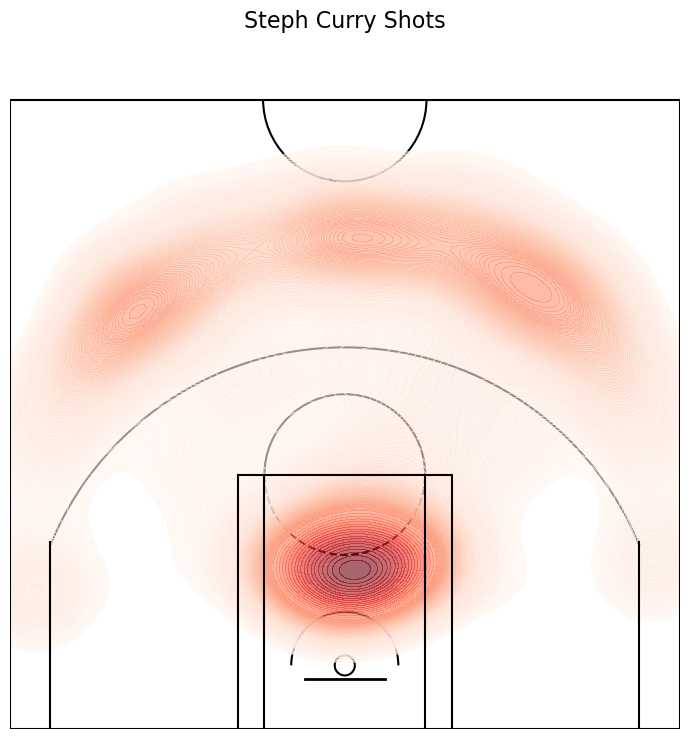

In [22]:
# Create plot and axis
fig, ax = plt.subplots(figsize = (9,9))

# Draw halfcourt on axis
draw_nba_court(ax)

# Overlay KDE heatmap of Curry's shot locations
kde = sns.kdeplot(
    x = curry_df['court_x'],
    y = curry_df['court_y'],
    fill = True,
    cmap = 'Reds',
    bw_adjust = 0.8,
    alpha = 0.6,
    levels = 100,
    thresh = 0.05,
    ax = ax)

plt.title("Steph Curry Shots", fontsize = 16)
plt.show()